In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [2]:
#ICs and parameters
rho_l = 1 #[kg/m**3]
u_l = 0 #[m/s]
p_l = 1000*100 #kN/m**2

rho_r = 0.125 # [kg/m**3]
u_r = 0 #[m/s]
p_r = 10*1000 #kN/m**2

dx = 0.25 #spatial discretization
L_0 = -10 #[m]
L_1 = 10 #[m]
nx = (L_1 - L_0)/dx +1
s = (3, nx)

gam = 1.4
# u = [rho, rho*u, rho*e_t]
# p = (1 - gam)*(rho*e_t - 0.5*rho*u^2)
e_t_l = (p_l/(gam - 1) - 0.5*rho_l*u_l**2)/rho_l
e_t_r = (p_r/(gam - 1) - 0.5*rho_r*u_r**2)/rho_r

u_init = numpy.zeros(s)
u_init[0][:nx/2] = rho_l
u_init[1][:nx/2] = u_l*rho_l
u_init[2][:nx/2] = e_t_l*rho_l

u_init[0][nx/2:] = rho_r
u_init[1][nx/2:] = u_r*rho_r
u_init[2][nx/2:] = e_t_r*rho_r

print(numpy.shape(u_init))
print(nx/2)

(3, 81)
40.5


/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:28: Deprecati

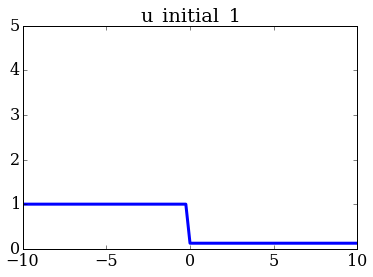

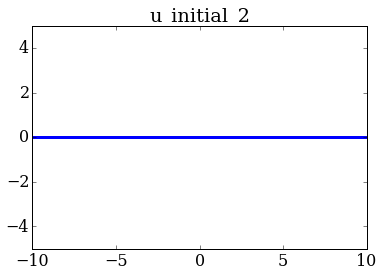

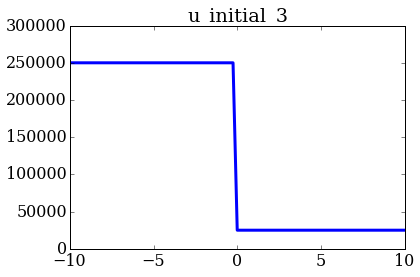

In [3]:
pyplot.plot(numpy.linspace(-10, 10, nx),u_init[0, :], lw=3)
pyplot.title("u_initial_1")
pyplot.ylim(0, 5);

pyplot.figure()
pyplot.plot(numpy.linspace(-10, 10, nx),u_init[1, :], lw=3)
pyplot.title("u_initial_2")
pyplot.ylim(-5, 5);

pyplot.figure()
pyplot.plot(numpy.linspace(-10, 10, nx),u_init[2, :], lw=3)
pyplot.title("u_initial_3")
#pyplot.ylim(-500,100);

In [4]:
def computeF(u):
    """Computes flux F = [rho*u, rho*u^2+p, (rho*et+p)*u]
    
    Parameters:
    u- vector of conserved values
    p - pressure
    
    Returns:
    F (array) - Array of Flux at each x. 
    """
    gam = 1.4 #value which is reasonable in air
    F = numpy.zeros_like(u)
    F[0] = u[1]
    F[1] = u[1]**2/u[0] + (gam-1)*(u[2] - 0.5*u[1]**2/u[0])
    F[2] = (u[2]+(gam - 1)*(u[2] - 0.5*u[1]**2/u[0]))*(u[1]/u[0])
    return F
#

In [5]:
def richtmyer(u, nt, dt, dx, nx):
    """Computes solution with Richtmyer scheme
    Parameters:
        u - vector of conserved quantities
        nt - number of time steps
        dt - time discretization
        dx - spatial discretization
        
    Returns:
        u_n - density after nt time steps at each point x
    """
    u_n = numpy.zeros((nt,3, nx))
    u_half = u.copy()
    u_n[:,:] = u.copy()
    u_half = u.copy()
    
    for t in range(1, nt):
        F = computeF(u) #predictor
        #u_half[:,:-1] = 0.5*(u[:,1:] + u[:,:-1]) - 0.5*dt/dx*(F[:,1:] - F[:,:-1])
        u_half[:,1:] = 0.5*(u[:,1:] + u[:,:-1]) - 0.5*dt/dx*(F[:,1:] - F[:,:-1])
        #print(numpy.shape(F), numpy.shape(u_half), numpy.shape(u))
        Fcorr = computeF(u_half) #corrector
        u_n[t, :, :-1] = u[:, :-1] - dt/dx*(Fcorr[:, 1:] - Fcorr[:, :-1])
        u = u_n[t, :, :].copy()
    return u_n

In [6]:
dt = 0.0002
T = 0.01
nt = int(T/dt)+1

u_n = richtmyer(u_init, nt, dt, dx, nx)

/home/randy/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [7]:
print(50*dt)

0.01


In [8]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(L_0, L_1, nx)
    y = data
    #print(numpy.shape(y))
    #print(numpy.shape(x))
    line.set_data(x,y[0, :])
    return line,


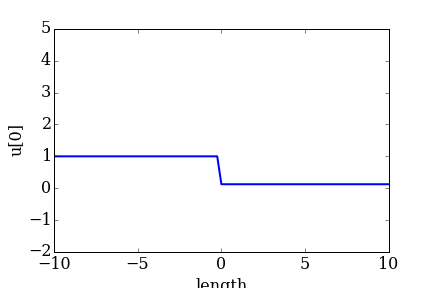
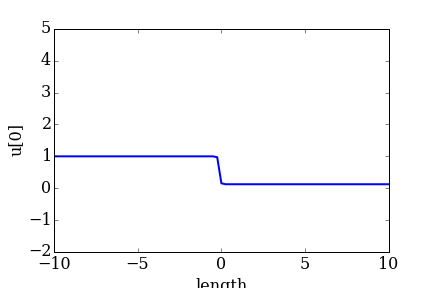
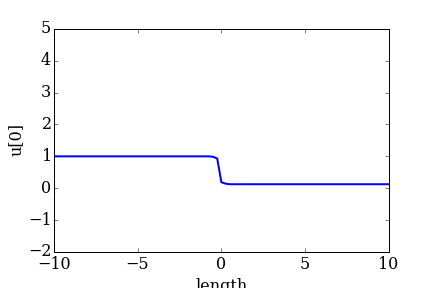
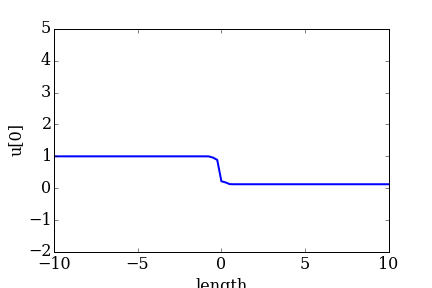
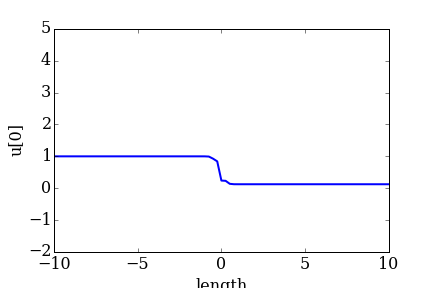
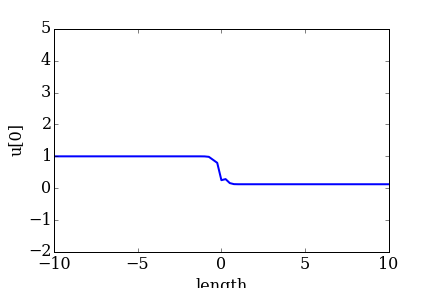
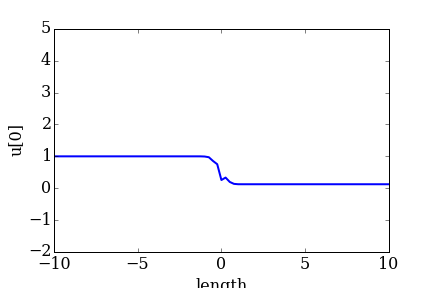
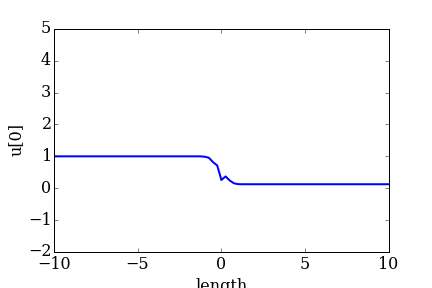
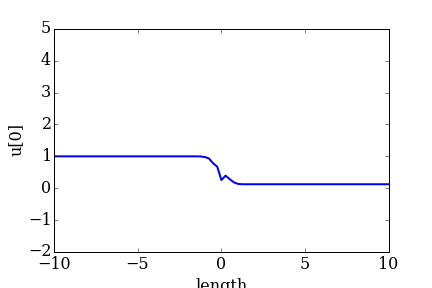
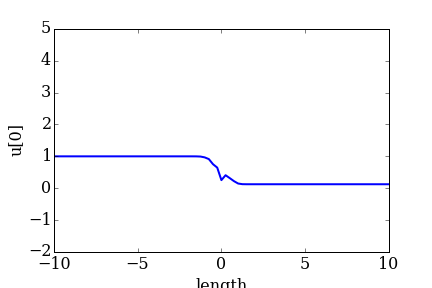
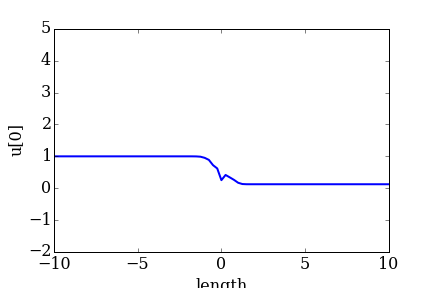
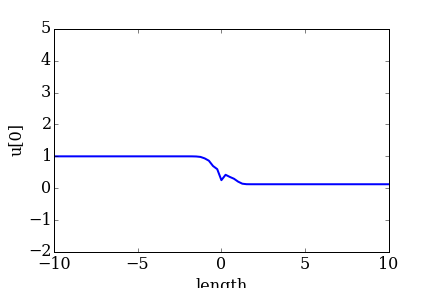
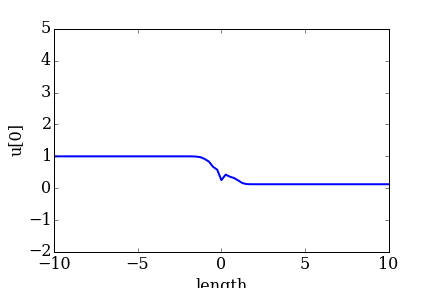
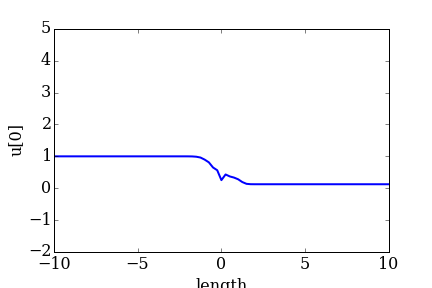
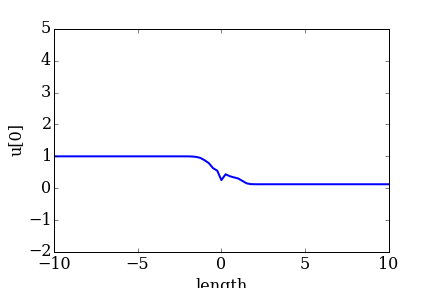
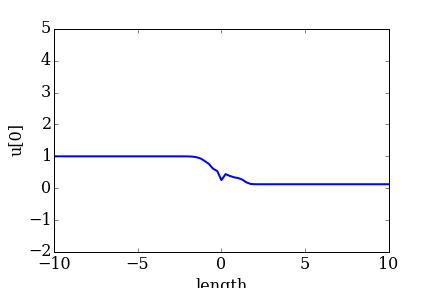
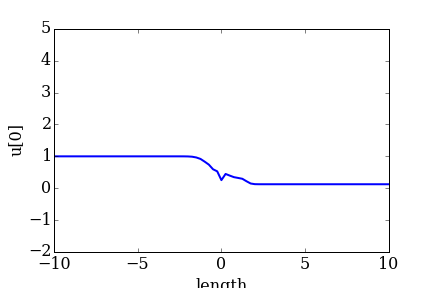
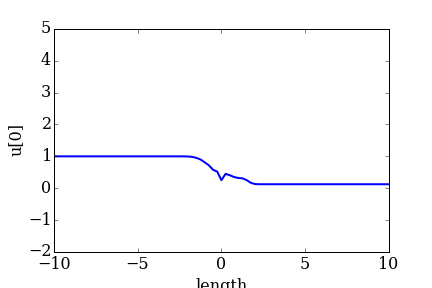
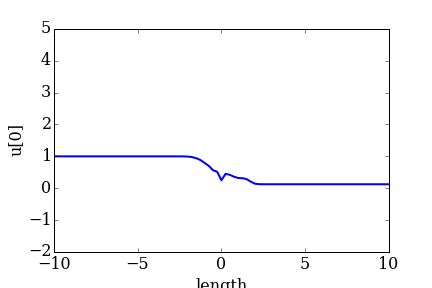
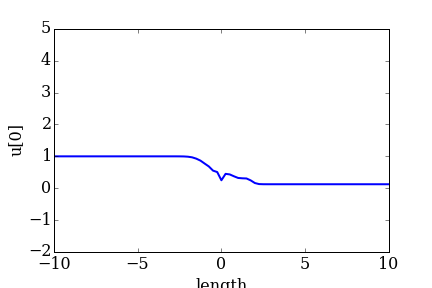
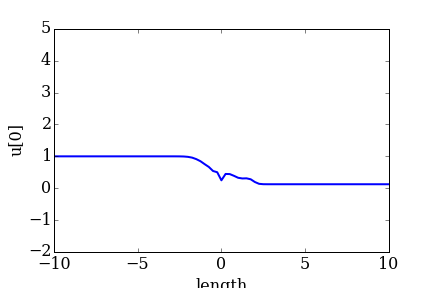
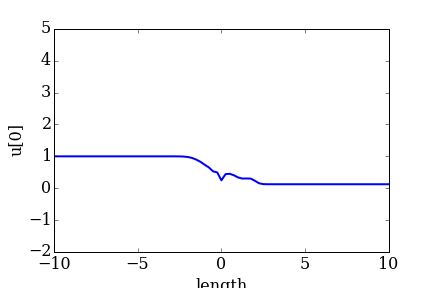
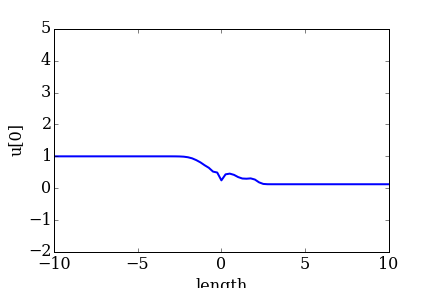
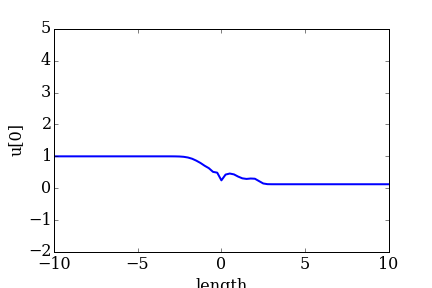
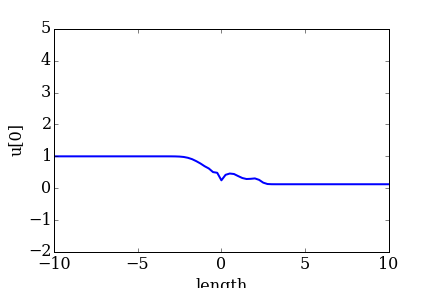
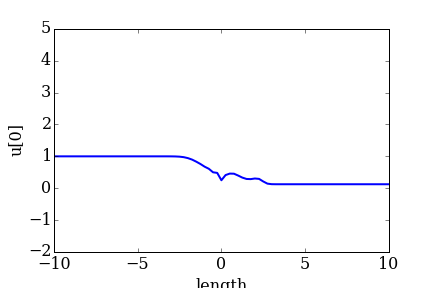
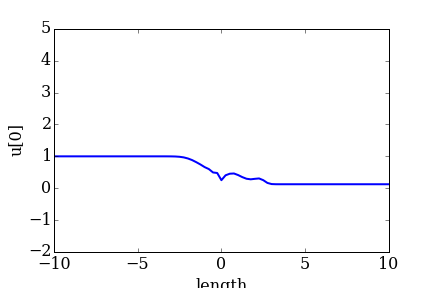
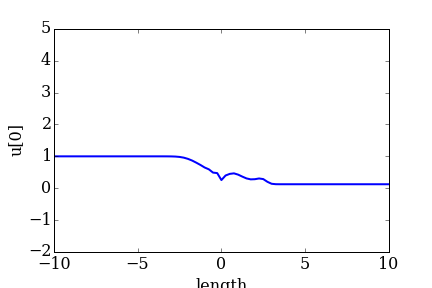
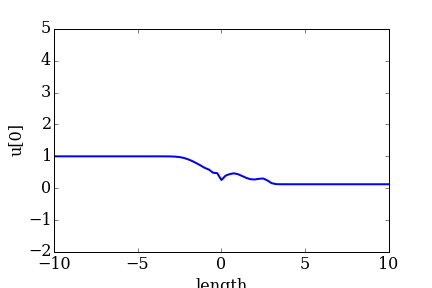
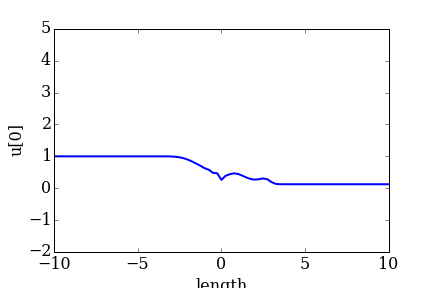
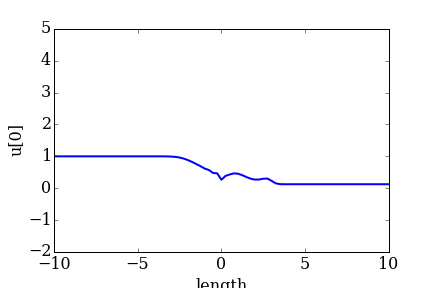
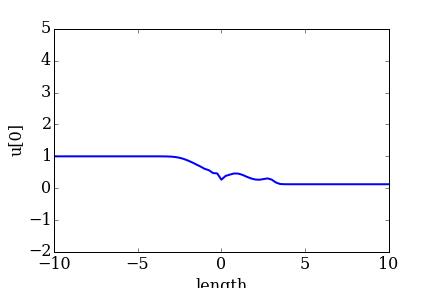
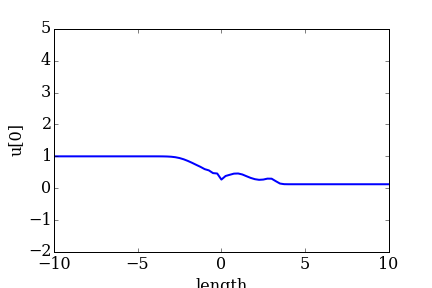
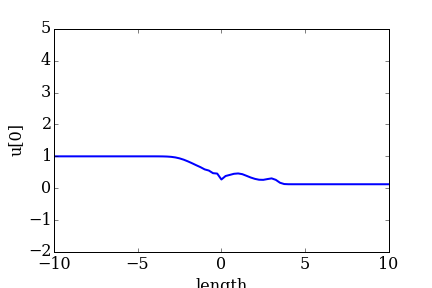
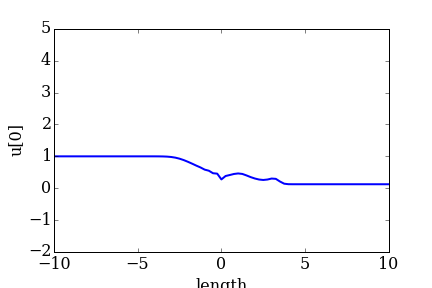
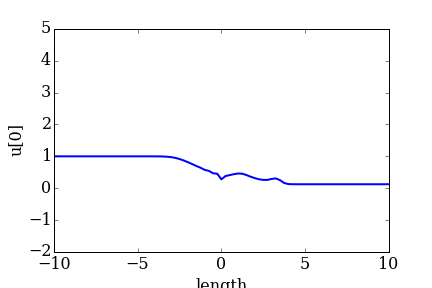
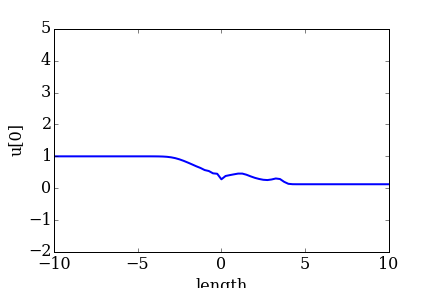
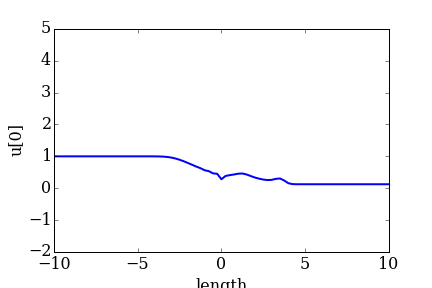
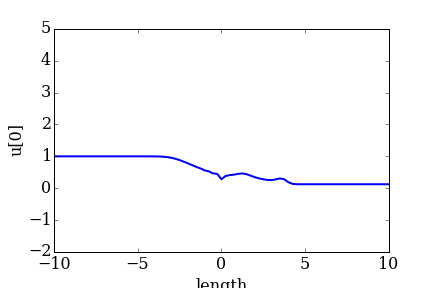
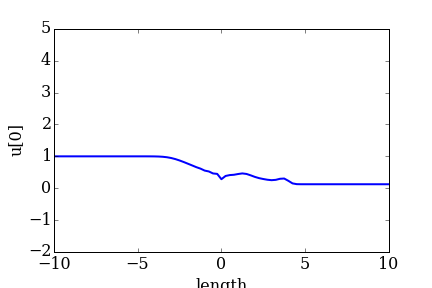
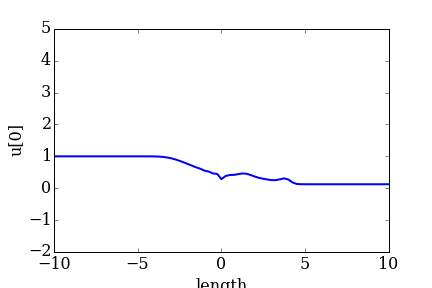
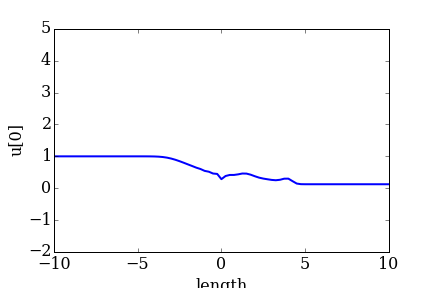
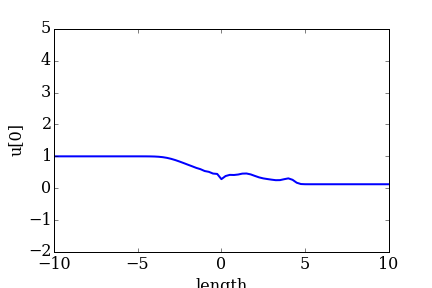
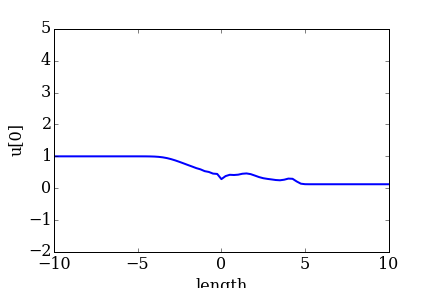
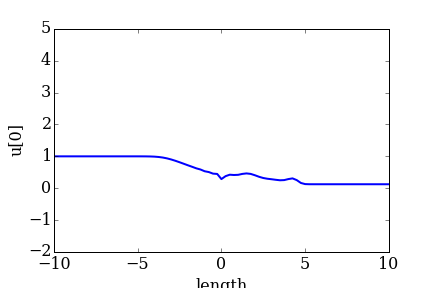
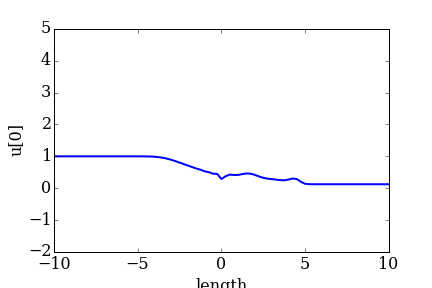
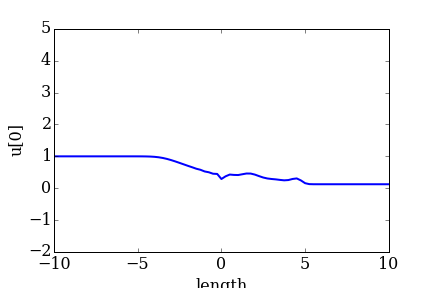
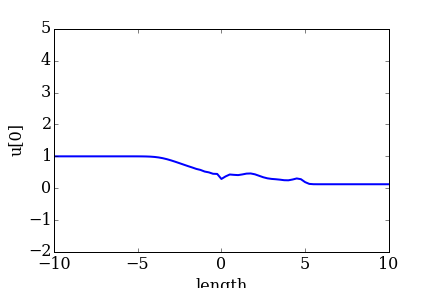
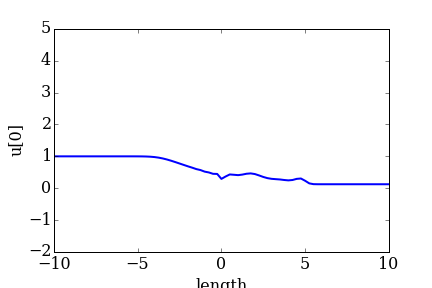
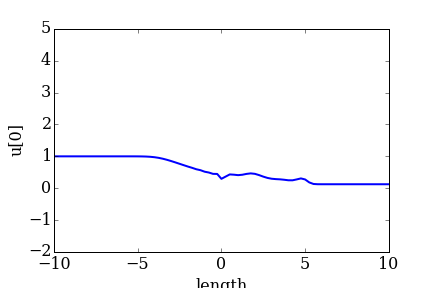
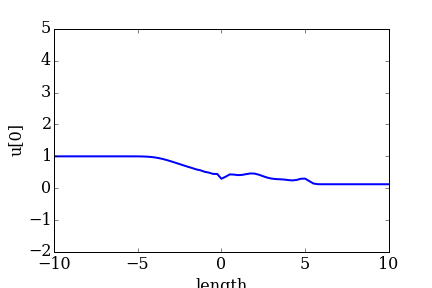

In [9]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10, 10), ylim=(-2, 5),xlabel=('length'),ylabel=('u[0]'))
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=u_n, interval=50)
display_animation(anim, default_mode='once')

In [10]:
def answers(x, u_n):
    gam = 1.4
    #ans = [0, 0, 0]
    #print(numpy.shape(ans))
    #den = u_n[-1, 0, x]
    den = u_n[nt-1, 0, x]# density kg/m^3
    
    vel = u_n[nt-1, 1, x]/den #velocity m/s
    #e_t = u_n[nt-1, 2, x]/den
    pres = (gam - 1)*(u_n[nt-1, 2, x] - 0.5*((u_n[nt-1, 1, x]**2)/(u_n[nt-1, 0, x])))# pressure N/m^2
    ans = [vel, pres, den]
    
    return ans

ans = answers(50, u_n)
print(ans)

#x = 2.5 is at nx=50
#print((u_n[-1, 0,50]))
#print(u_n[-1, 1, 50])
#print(u_n[-1, 1, 50])


[292.61147152682651, 30250.89016757203, 0.3746914026476012]


In [11]:
print (numpy.shape(ans))
print(numpy.shape(u_n))

(3,)
(51, 3, 81)
